In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt
import MeCab
import gensim
from sklearn.manifold import TSNE
import numpy as np
import os

In [2]:
# 分かち書きをする
def mecab_analysis(text):
    t = MeCab.Tagger('-Owakati')
    return t.parse(text).split(" ")

sentences = []

files = os.listdir('news')
for file in files:
    with open("news/" + file) as f:
        for line in f.read().split("。"):
            sentences.append(mecab_analysis(line))

In [3]:
#word2vecを学習させる
word2vec_model = gensim.models.Word2Vec(sentences, min_count=5)

In [4]:
# 出現回数が 50 以上の単語の一覧を取得する
vocabs = []
vocab_thresh = 50
for word, vocab_obj in word2vec_model.wv.vocab.items():
    if vocab_obj.count >= vocab_thresh:
        vocabs.append(word)

n_vocab = len(vocabs)
print(u"単語数={}", n_vocab)

### t-SNE モデルを作成 ###
# numpy で指数表示を禁止
np.set_printoptions(suppress=True)
# see at https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
model = TSNE(n_components=2, random_state=0)
model.fit_transform(
    np.vstack(
        tuple([word2vec_model.wv[v] for v in vocabs])))

単語数={} 291


array([[  4.1041827 ,  11.022197  ],
       [ 12.599271  ,  17.659756  ],
       [ -2.861124  ,   5.487205  ],
       [ -3.758812  ,   3.1913216 ],
       [  2.6875844 ,  -4.1274405 ],
       [ 10.042119  ,   6.407939  ],
       [ 15.377402  ,  18.315203  ],
       [ 15.194318  ,  17.196043  ],
       [ -8.882352  ,  -4.4815354 ],
       [ 18.15615   ,  20.897408  ],
       [ 16.249449  ,  20.323254  ],
       [ 17.398457  ,  19.627136  ],
       [  9.966257  ,   9.714822  ],
       [ 17.926954  ,  21.456131  ],
       [ 16.185215  ,  19.380089  ],
       [ -9.4648905 ,  -4.2011423 ],
       [ -9.777924  , -13.508212  ],
       [-14.421581  , -15.234686  ],
       [ -8.295521  ,  -4.3357277 ],
       [ -2.3472044 ,   5.2812824 ],
       [-12.642285  , -10.037242  ],
       [  2.7676582 ,   7.8871846 ],
       [ -9.16388   , -14.004011  ],
       [-10.282477  , -14.69626   ],
       [-13.521755  ,  -7.1209936 ],
       [ 15.737116  ,  19.641256  ],
       [  9.633937  ,   9.002159  ],
 

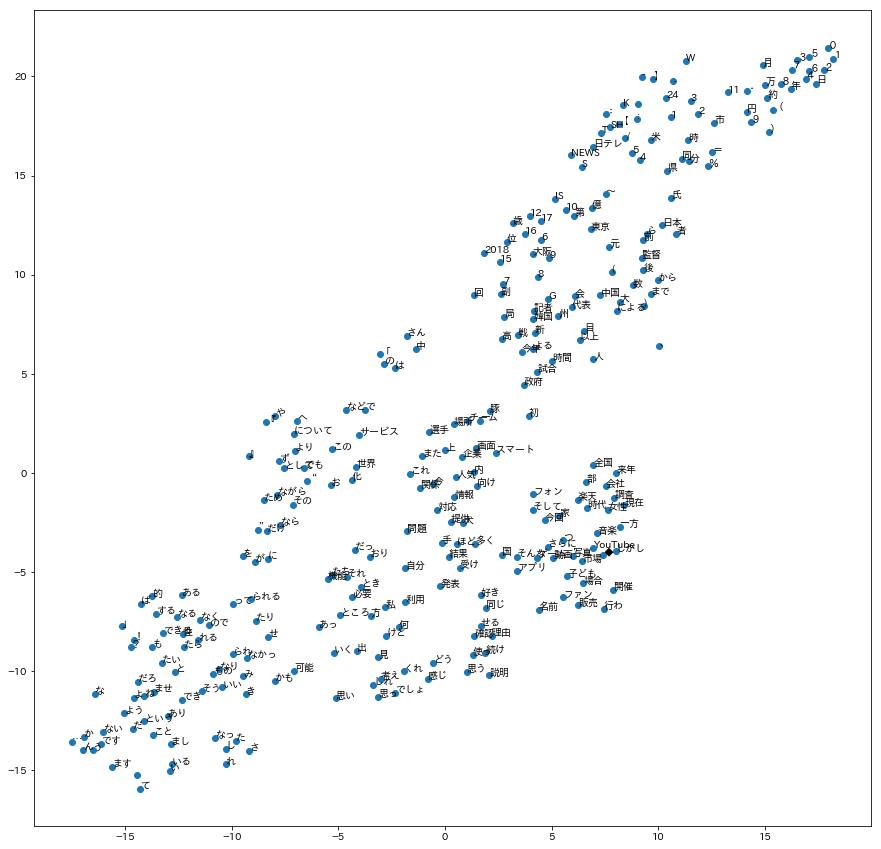

In [5]:
### matplotlibで t-SNEの図を描く ###

# 全単語を出力
skip = 0
limit = n_vocab

# 40 * 40 の画像
plt.figure(figsize=(15,15))
# 散布図を描く(引数は x, y)
plt.scatter(model.embedding_[skip:limit, 0], model.embedding_[skip:limit, 1])

# 実際の描画プログラム
count = 0
for label, x, y in zip(vocabs, model.embedding_[:, 0], model.embedding_[:, 1]):
    count +=1
    if count < skip:
        continue
    
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    
    if count == limit:
        break

plt.show()